In [5]:
import logging

In [6]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [7]:
logger.info('Beginning the analysis')

INFO:__main__:Beginning the analysis


In [8]:
logger.info('importing libraries')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib_venn import venn3
from matplotlib.patches import Patch
print(os.getcwd())

INFO:__main__:importing libraries


c:\Users\Abdulaziz\Desktop\10 Academy\Rossmann_Pharmaceuticals\notebooks


In [9]:
#load the data
logger.info('Loading the data')
df_store=pd.read_csv('../Data/store.csv')
df_test=pd.read_csv('../Data/test.csv')
df_train=pd.read_csv('../Data/train.csv')

INFO:__main__:Loading the data
C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_2688\2811838400.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('../Data/train.csv')


In [79]:
df_store.head()

Store StoreType Assortment  CompetitionDistance  \
802463    880         a          c               4570.0   
802462    880         a          c               4570.0   
802461    880         a          c               4570.0   
802460    880         a          c               4570.0   
802459    880         a          c               4570.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
802463                        NaN                       NaN       0   
802462                        NaN                       NaN       0   
802461                        NaN                       NaN       0   
802460                        NaN                       NaN       0   
802459                        NaN                       NaN       0   

        Promo2SinceWeek  Promo2SinceYear PromoInterval  DayOfWeek       Date  \
802463              NaN              NaN           NaN          2 2013-01-01   
802462              NaN              NaN           NaN          3 2013-01-02   
802461              NaN              NaN           NaN          4 2013-01-03   
802460              NaN              NaN           NaN          5 2013-01-04   
802459              NaN              NaN           NaN          6 2013-01-05   

        Sales  Customers  Open  Promo StateHoliday  SchoolHoliday  
802463      0          0     0      0            a              1  
802462   6735        751     1      0            0              1  
802461   6170        670     1      0            0              1  
802460   5869        696     1      0            0              1  
802459   4829        527     1      0            0              0

In [11]:
# i want to see if there is a null value for Promo2SinceWeek for Promo2 is 1
promo2_df=df_store[df_store['Promo2']==1]
null_values=promo2_df['Promo2SinceWeek'].isnull().sum()
null_valuesyear=promo2_df['Promo2SinceYear'].isnull().sum()
null_valuesint=promo2_df['PromoInterval'].isnull().sum()
print(null_values)
print(null_valuesyear)
print(null_valuesint)

0
0
0


In [12]:
df_store.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [13]:
df_train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [14]:
df_train['DayOfWeek'].unique()
# monday to Sunday

array([5, 4, 3, 2, 1, 7, 6])

In [15]:
df_train.shape

(1017209, 9)

In [16]:
df_test.head()

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0

In [17]:
df_test.shape

(41088, 8)

In [18]:
1017209+41088

1058297

In [19]:
1017209*100/1058297

96.11753600359823

This shows 96% of the entire data is the train data, whereas the test is 4% of the data

In [20]:
logger.info('distribution in both training and test sets ')

INFO:__main__:distribution in both training and test sets 


Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?


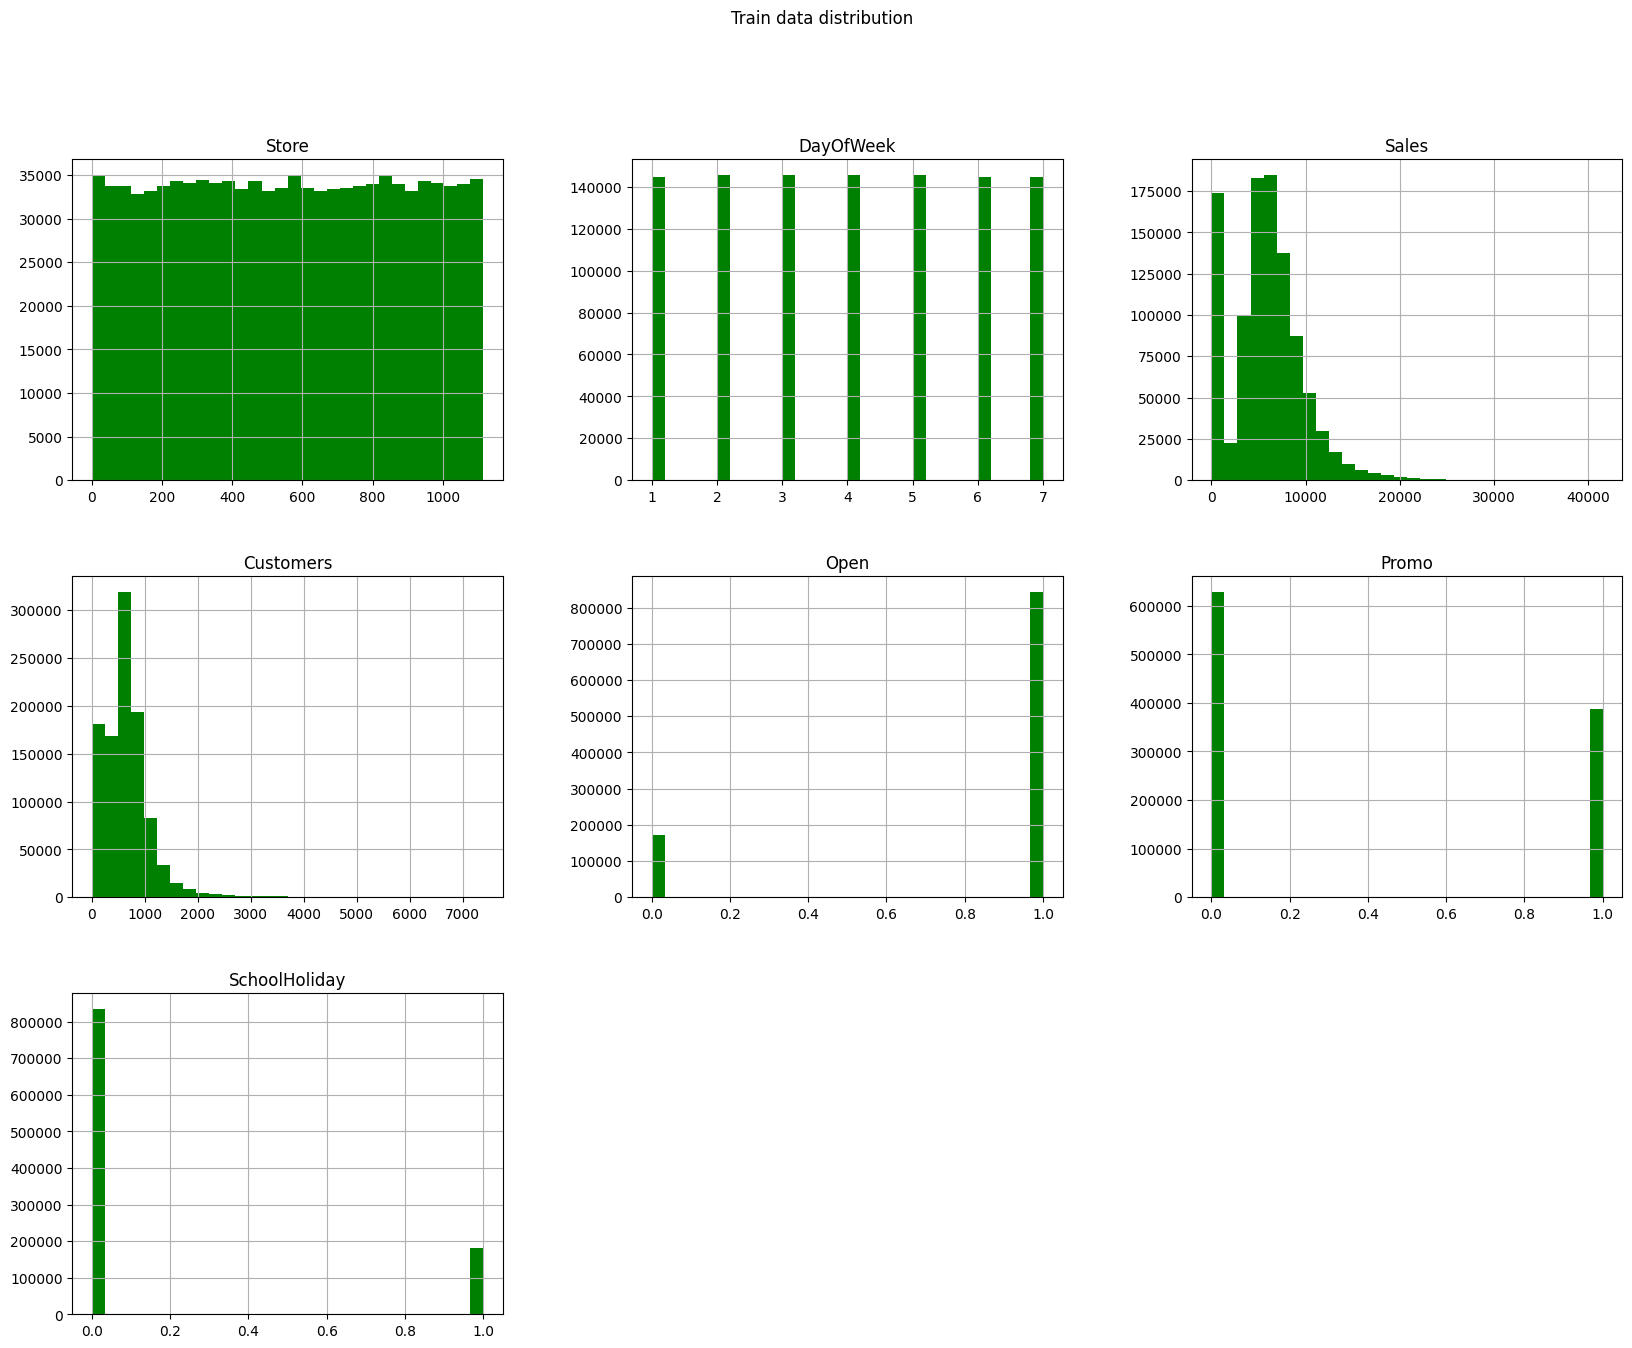

In [21]:
df_train.hist(bins=30, figsize=(20,15), color='Green')
plt.suptitle('Train data distribution')
plt.show()


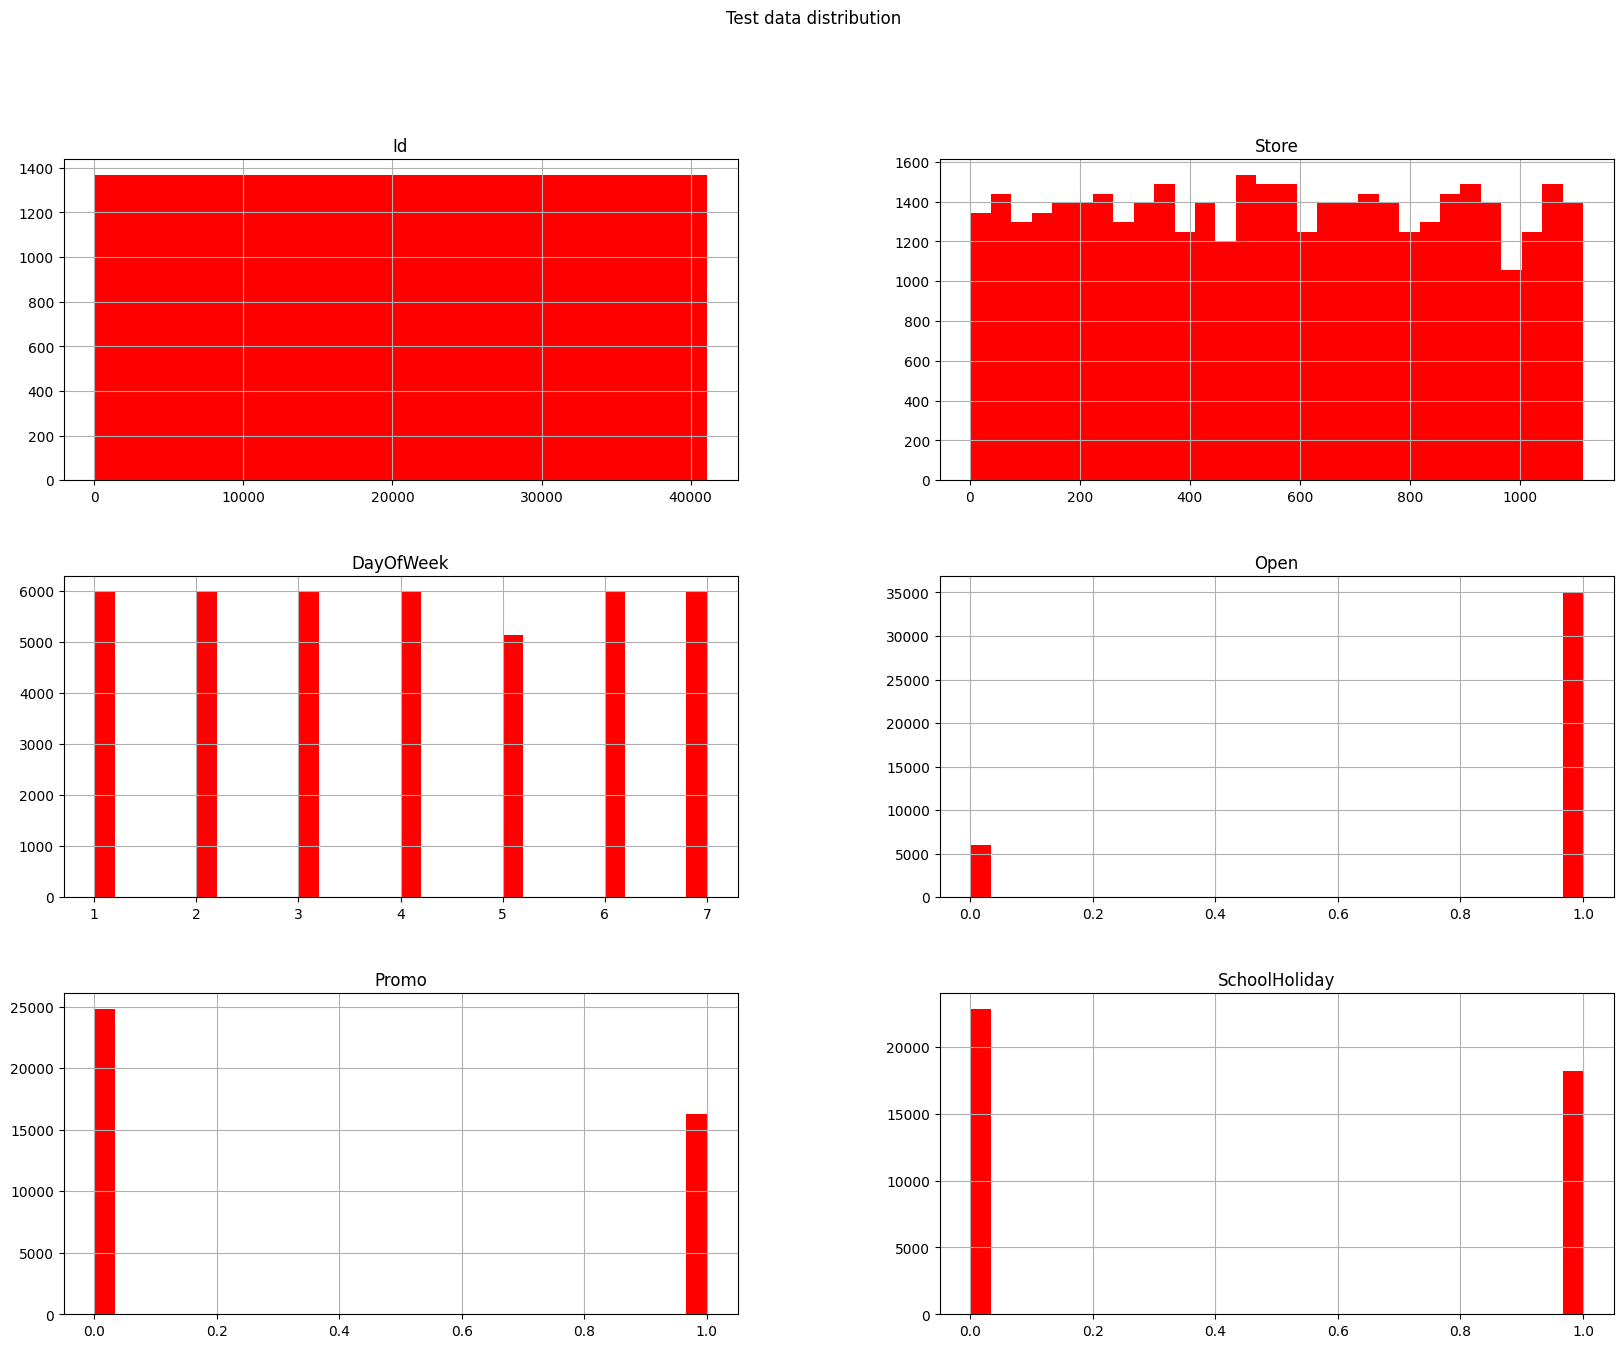

In [22]:
df_test.hist(bins=30, figsize=(20,15),color='Red')
plt.suptitle('Test data distribution')
plt.show()


promo = 1 for train is around 40,000 but in test it is almost 16000

Check & compare sales behavior before, during, and after holidays

In [23]:
logger.info('checking sales behaviour before and after holidays')

INFO:__main__:checking sales behaviour before and after holidays


In [24]:
df_train['StateHoliday'].unique()
# . a = public holiday, b = Easter holiday, c = Christmas, 0 = None


array(['0', 'a', 'b', 'c', 0], dtype=object)

In [25]:
df_train[df_train['StateHoliday']=='0'].count()

Store            855087
DayOfWeek        855087
Date             855087
Sales            855087
Customers        855087
Open             855087
Promo            855087
StateHoliday     855087
SchoolHoliday    855087
dtype: int64

In [26]:
df_test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [27]:
# Replace '0' with 0
df_train['StateHoliday'] = df_train['StateHoliday'].replace('0', 0)


In [28]:
df_train['StateHoliday'].unique()
# . a = public holiday, b = Easter holiday, c = Christmas, 0 = None


array([0, 'a', 'b', 'c'], dtype=object)

In [29]:
df_train[df_train['StateHoliday']==0].count()

Store            986159
DayOfWeek        986159
Date             986159
Sales            986159
Customers        986159
Open             986159
Promo            986159
StateHoliday     986159
SchoolHoliday    986159
dtype: int64

In [30]:
#before holiday
#after holiday
#during holiday
# Convert the 'Date' column to datetime format
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Sort the DataFrame by date
df = df_train.sort_values('Date')

# Create a DataFrame for during holidays
df_during_holiday = df[df['StateHoliday'] != 0]

# Create a DataFrame for after holidays
df_after_holiday = df[df['Date'] > df_during_holiday['Date'].max()]

# Create a DataFrame for before holidays
df_before_holiday = df[df['Date'] < df_during_holiday['Date'].min()]


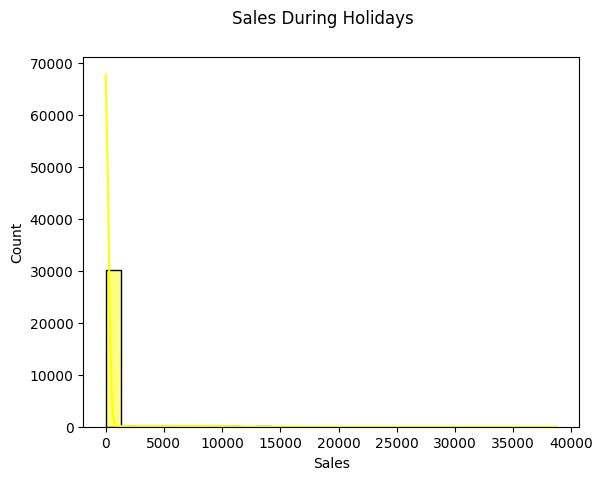

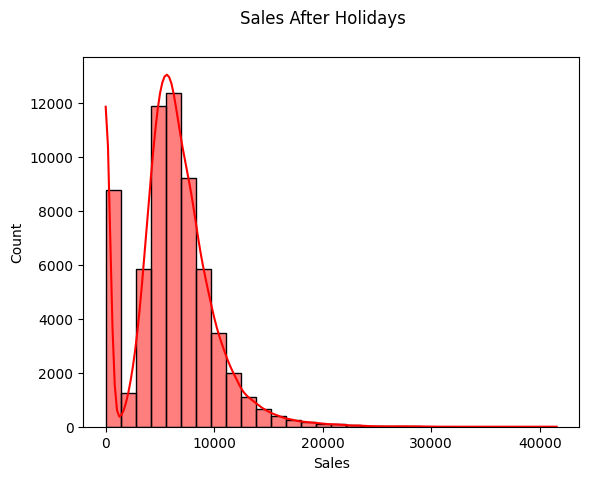

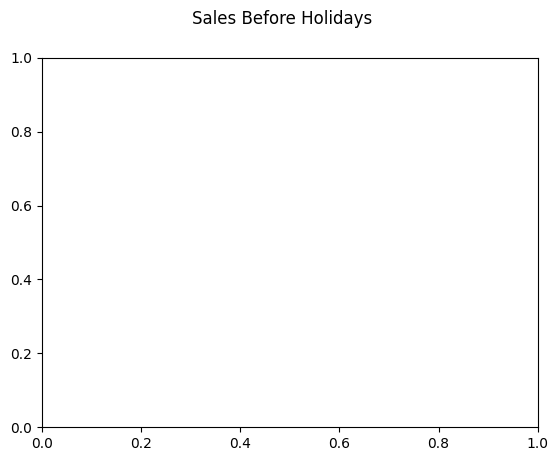

In [31]:



# Plot for during holidays
sns.histplot(df_during_holiday['Sales'], bins=30, kde=True, color='yellow')
plt.suptitle('Sales During Holidays')
plt.show()

# Plot for after holidays
sns.histplot(df_after_holiday['Sales'], bins=30, kde=True , color='red')
plt.suptitle('Sales After Holidays')
plt.show()

# Plot for before holidays
sns.histplot(df_before_holiday['Sales'], bins=30, kde=True, color='pink')
plt.suptitle('Sales Before Holidays')
plt.show()


In [32]:
#before holiday
#after holiday
#during holiday
# Convert the 'Date' column to datetime format
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Sort the DataFrame by date
df = df_train.sort_values('Date')

# Create a DataFrame for during holidays
df_during_holiday = df[df['SchoolHoliday'] != 0]

# Create a DataFrame for after holidays
df_after_holiday = df[df['Date'] > df_during_holiday['Date'].max()]

# Create a DataFrame for before holidays
df_before_holiday = df[df['Date'] < df_during_holiday['Date'].min()]


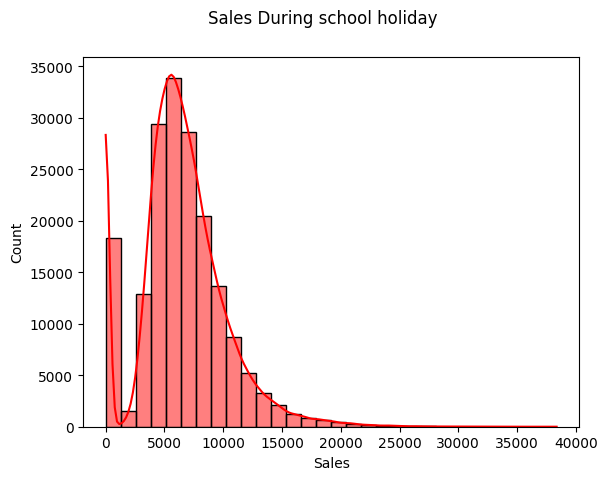

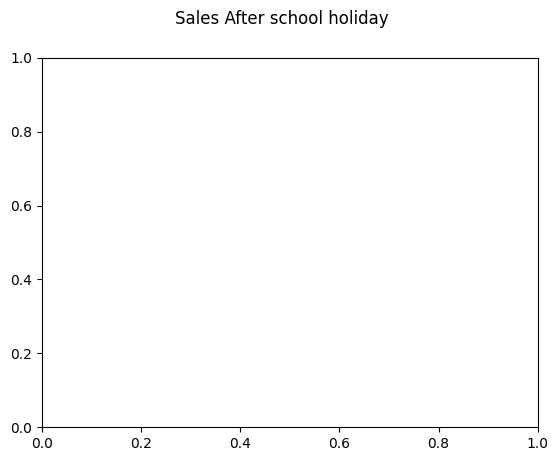

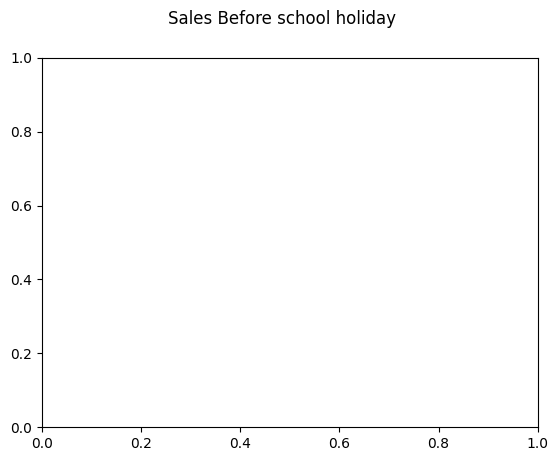

In [33]:


# Assuming 'Sales' is the column in your DataFrame that represents sales
# and 'Date' is the column that represents the date of the sale

# Plot for during holidays
sns.histplot(df_during_holiday['Sales'], bins=30, kde=True, color='red')
plt.suptitle('Sales During school holiday')
plt.show()

# Plot for after school holiday
sns.histplot(df_after_holiday['Sales'], bins=30, kde=True , color='orange')
plt.suptitle('Sales After school holiday')
plt.show()

# Plot for before school holiday
sns.histplot(df_before_holiday['Sales'], bins=30, kde=True, color='blue')
plt.suptitle('Sales Before school holiday')
plt.show()


Find out any seasonal (Christmas, Easter, etc) purchase behaviors,


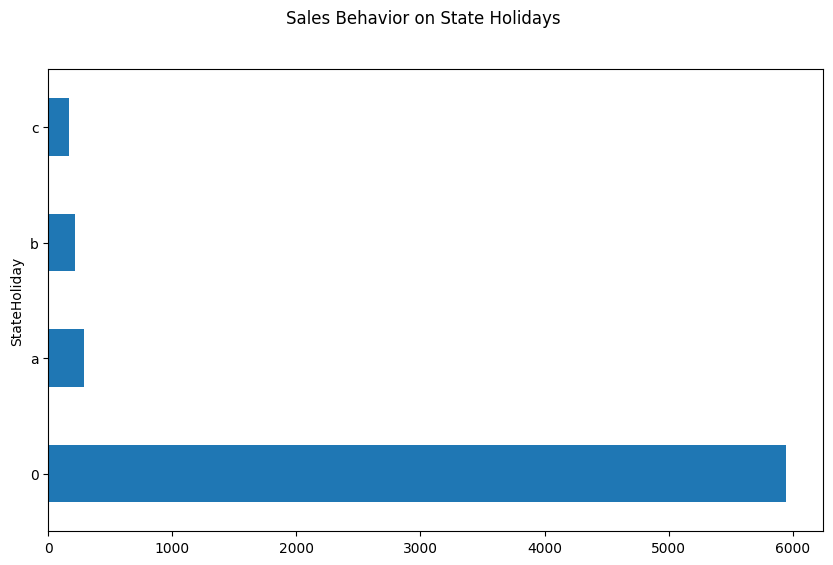

In [34]:
# Group by 'StateHoliday' and calculate the mean sales
df_stateholiday = df_train.groupby('StateHoliday')['Sales'].mean()

# Plot the bar chart
df_stateholiday.plot(kind='barh', figsize=(10,6))

plt.suptitle('Sales Behavior on State Holidays')
plt.show()


In [35]:
df_stateholiday.head()

StateHoliday
0    5947.483893
a     290.735686
b     214.311510
c     168.733171
Name: Sales, dtype: float64

What can you say about the correlation between sales and the number of customers?


In [36]:
logger.info('checking correlation between sales and the number of customers')

INFO:__main__:checking correlation between sales and the number of customers


In [37]:
correlation =df_train['Sales'].corr(df_train['Customers'])
correlation 

np.float64(0.8947107733017035)

How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


In [38]:
logger.info('checking promotion effect on sales')

INFO:__main__:checking promotion effect on sales


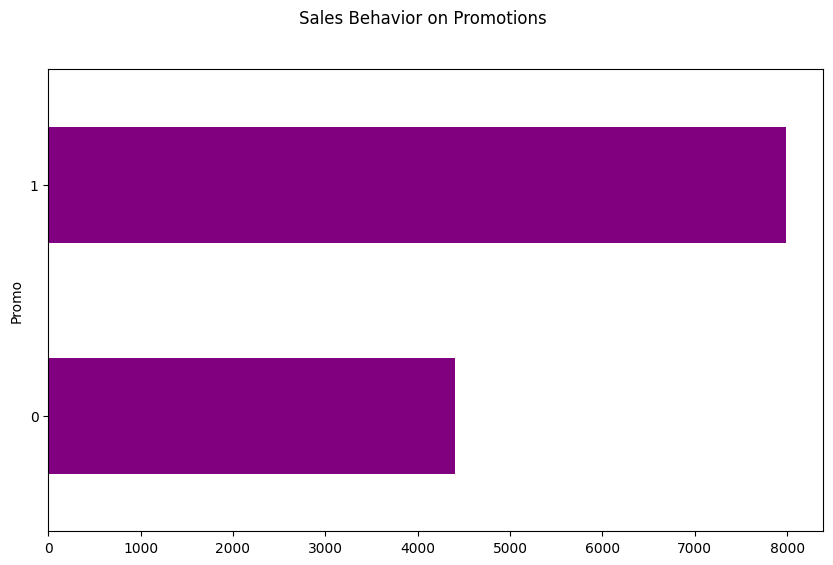

In [39]:
# how does promo affect sales

df_promo = df_train.groupby('Promo')['Sales'].mean()

# Plot the bar chart
df_promo.plot(kind='barh', figsize=(10,6), color='purple')

plt.suptitle('Sales Behavior on Promotions')
plt.show()


In [40]:

avg_customers_during_promos = df_train[df_train['Promo'] == 1]['Customers'].mean()
avg_customers_without_promos = df_train[df_train['Promo'] == 0]['Customers'].mean()

print(f"Average customers during promos: {avg_customers_during_promos}")
print(f"Average customers without promos: {avg_customers_without_promos}")


Average customers during promos: 820.0988146773861
Average customers without promos: 517.8235417537579


In [41]:
logger.info('checking in which store to deploy more promos')

INFO:__main__:checking in which store to deploy more promos


Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


In [44]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [45]:
df_store['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [46]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [47]:

df = pd.merge(df_store, df_train, on='Store')

# Now, let's compare the sales during promotional periods vs non-promotional periods
promo_sales = df[df['Promo2'] == 1]['Sales'].mean()
non_promo_sales = df[df['Promo2'] == 0]['Sales'].mean()

print(f"Average sales during promotional periods: {promo_sales}")
print(f"Average sales during non-promotional periods: {non_promo_sales}")


Average sales during promotional periods: 5423.718218383355
Average sales during non-promotional periods: 6124.710161387789


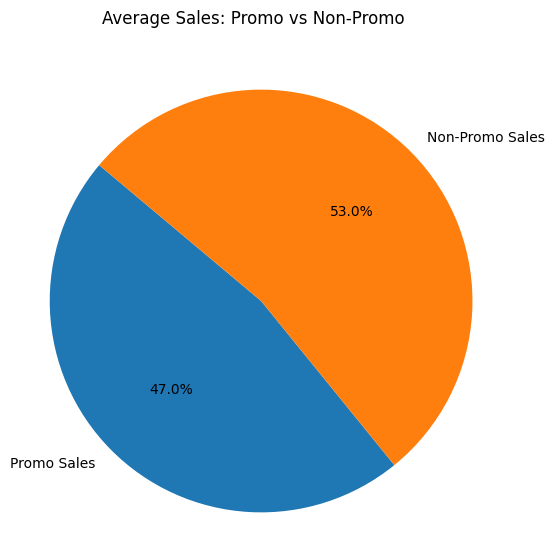

In [48]:


# Data to plot
labels = ['Promo Sales', 'Non-Promo Sales']
sizes = [promo_sales, non_promo_sales]

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.suptitle('Average Sales: Promo vs Non-Promo')
plt.show()


In [49]:
# Calculate total sales for each store
store_sales = df.groupby('Store')['Sales'].sum()

# Get the top 10 stores with highest sales
top_stores = store_sales.nlargest(10)

print("Top 10 stores with highest sales:")
print(top_stores)


Top 10 stores with highest sales:
Store
262     19516842
817     17057867
562     16927322
1114    16202585
251     14896870
513     14252406
788     14082141
733     14067158
383     13489879
756     12911782
Name: Sales, dtype: int64


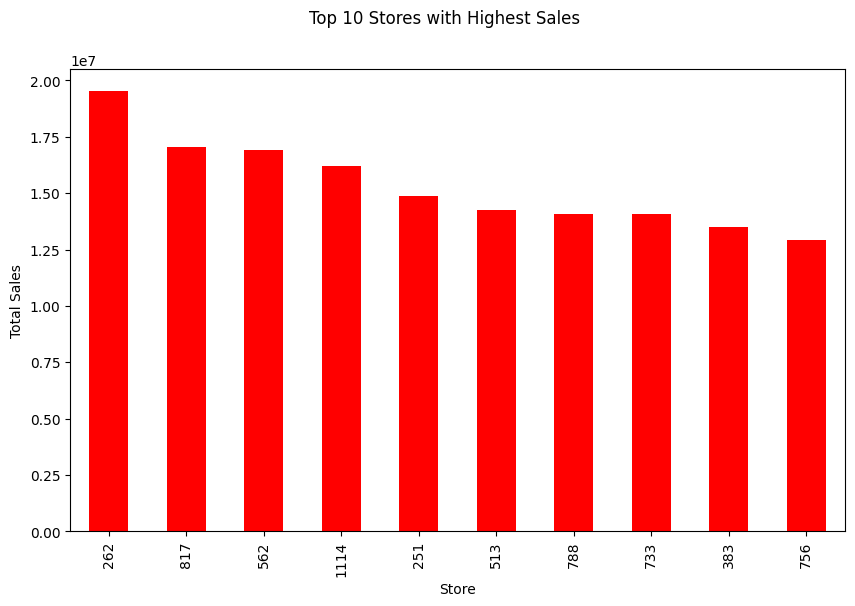

In [50]:


# Plot
plt.figure(figsize=(10,6))
top_stores.plot(kind='bar', color='red')
plt.suptitle('Top 10 Stores with Highest Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


In [52]:
# Analyze stores with high sales volume
high_sales_stores = store_sales.nlargest(10).index

# Analyze stores near competitors
near_competitors = df_store[df_store['CompetitionDistance'] < df_store['CompetitionDistance'].median()]['Store']

# Analyze stores by type and assortment
store_types = df_store[df_store['StoreType'].isin(['a', 'b'])]['Store']
wide_assortment = df_store[df_store['Assortment'] == 'c']['Store']

# Analyze stores with successful past promotions
successful_promos = df[df['Promo2'] == 1].groupby('Store')['Sales'].sum()
successful_promos = successful_promos[successful_promos > successful_promos.median()].index

# Stores that meet all criteria
promo_candidates = set(high_sales_stores) & set(near_competitors) & set(store_types) & set(wide_assortment) & set(successful_promos)

print("Stores that are good candidates for promotions:")
print(promo_candidates)

Stores that are good candidates for promotions:
{756}


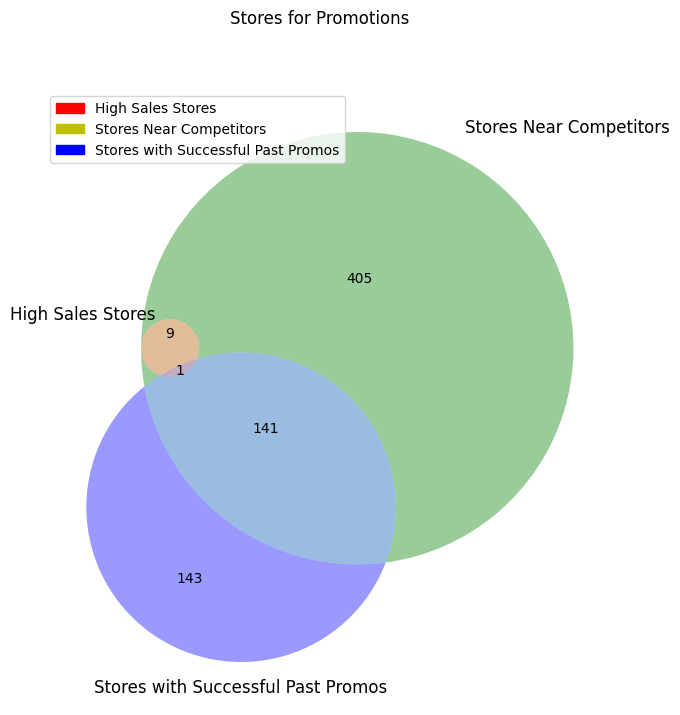

In [55]:



# Create the Venn diagram
plt.figure(figsize=(8,8))
venn = venn3([set(high_sales_stores), set(near_competitors), set(successful_promos)],
      set_labels = ('High Sales Stores', 'Stores Near Competitors', 'Stores with Successful Past Promos'))

# Create legend
legend_elements = [Patch(facecolor='r', edgecolor='r',
                        label='High Sales Stores'),
                  Patch(facecolor='y', edgecolor='y',
                        label='Stores Near Competitors'),
                  Patch(facecolor='b', edgecolor='b',
                        label='Stores with Successful Past Promos')]

plt.legend(handles=legend_elements, loc='best')

plt.suptitle('Stores for Promotions')
plt.show()


Trends of customer behavior during store opening and closing times


In [56]:
avg_sales_open = df_train[df_train['Open'] == 1]['Sales'].mean()
avg_sales_closed = df_train[df_train['Open'] == 0]['Sales'].mean()

avg_customers_open = df_train[df_train['Open'] == 1]['Customers'].mean()
avg_customers_closed = df_train[df_train['Open'] == 0]['Customers'].mean()
print(avg_sales_closed)
print(avg_sales_open)
print(avg_customers_closed)
print(avg_customers_open)

0.0
6955.514290755952
0.0
762.7283951055907


In [57]:
sales_by_day = df_train.groupby('DayOfWeek')['Sales'].mean()
customers_by_day = df_train.groupby('DayOfWeek')['Customers'].mean()
print(sales_by_day)
print(customers_by_day)

DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64
DayOfWeek
1    813.065791
2    760.984615
3    721.639666
4    697.541486
5    743.150742
6    657.112237
7     35.786817
Name: Customers, dtype: float64


In [58]:
sales_during_state_holidays = df_train[df_train['StateHoliday'] != '0']['Sales'].mean()
sales_during_school_holidays = df_train[df_train['SchoolHoliday'] == 1]['Sales'].mean()
sales_during_promos = df_train[df_train['Promo'] == 1]['Sales'].mean()
print(sales_during_state_holidays)
print(sales_during_school_holidays)
print(sales_during_promos)


5773.818972305593
6476.522207119706
7991.152045969903


In [59]:
# Average sales during both state holidays and school holidays
sales_state_school_holidays = df_train[(df_train['StateHoliday'] != '0') & (df_train['SchoolHoliday'] == 1)]['Sales'].mean()

# Average sales during state holidays with a promotion
sales_state_holiday_promo = df_train[(df_train['StateHoliday'] != '0') & (df_train['Promo'] == 1)]['Sales'].mean()

# Average sales during school holidays with a promotion
sales_school_holiday_promo = df_train[(df_train['SchoolHoliday'] == 1) & (df_train['Promo'] == 1)]['Sales'].mean()

# Average sales during state holidays, school holidays, and a promotion
sales_state_school_holiday_promo = df_train[(df_train['StateHoliday'] != '0') & (df_train['SchoolHoliday'] == 1) & (df_train['Promo'] == 1)]['Sales'].mean()

print("Average sales during both state holidays and school holidays:", sales_state_school_holidays)
print("Average sales during state holidays with a promotion:", sales_state_holiday_promo)
print("Average sales during school holidays with a promotion:", sales_school_holiday_promo)
print("Average sales during state holidays, school holidays, and a promotion:", sales_state_school_holiday_promo)


Average sales during both state holidays and school holidays: 6476.522207119706
Average sales during state holidays with a promotion: 7991.152045969903
Average sales during school holidays with a promotion: 7899.810065528245
Average sales during state holidays, school holidays, and a promotion: 7899.810065528245


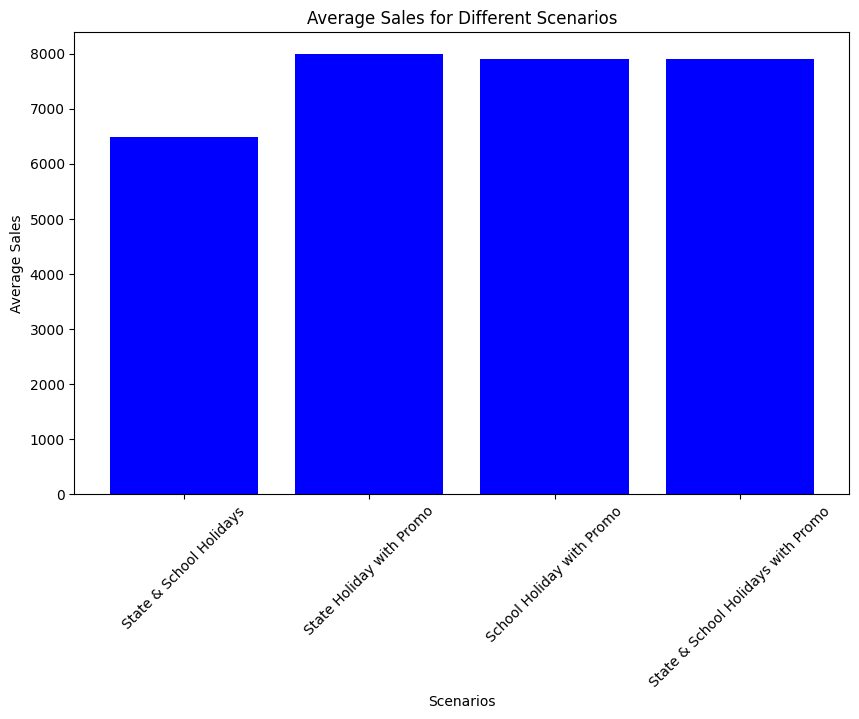

In [60]:


# Data to plot
sales_data = [sales_state_school_holidays, sales_state_holiday_promo, sales_school_holiday_promo, sales_state_school_holiday_promo]
labels = ['State & School Holidays', 'State Holiday with Promo', 'School Holiday with Promo', 'State & School Holidays with Promo']

# Create bar plot
plt.figure(figsize=(10,6))
plt.bar(labels, sales_data, color='blue')
plt.title('Average Sales for Different Scenarios')
plt.xlabel('Scenarios')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


Which stores are open on all weekdays? How does that affect their sales on weekends? 


In [61]:
logger.info('checking if stores are open on weekdays')

INFO:__main__:checking if stores are open on weekdays


In [62]:
# Find stores that are open on all weekdays
weekday_data = df_train[(df_train['DayOfWeek'] >= 1) & (df_train['DayOfWeek'] <= 5)]
closed_weekday_stores = weekday_data[weekday_data['Open'] == 0]['Store'].unique()
all_weekday_open_stores = set(weekday_data['Store'].unique()) - set(closed_weekday_stores)

print("Stores open on all weekdays:", all_weekday_open_stores)


Stores open on all weekdays: {np.int64(769), np.int64(262), np.int64(423), np.int64(1097), np.int64(682), np.int64(494), np.int64(335), np.int64(562), np.int64(85), np.int64(733)}


In [63]:
# Calculate average weekend sales for stores open on all weekdays
weekend_data = df_train[(df_train['DayOfWeek'] == 6) | (df_train['DayOfWeek'] == 7)]
avg_weekend_sales_all_weekday_open = weekend_data[weekend_data['Store'].isin(all_weekday_open_stores)]['Sales'].mean()

# Calculate average weekend sales for stores not open on all weekdays
avg_weekend_sales_not_all_weekday_open = weekend_data[~weekend_data['Store'].isin(all_weekday_open_stores)]['Sales'].mean()

print("Average weekend sales for stores open on all weekdays:", avg_weekend_sales_all_weekday_open)
print("Average weekend sales for stores not open on all weekdays:", avg_weekend_sales_not_all_weekday_open)


Average weekend sales for stores open on all weekdays: 11627.113059701493
Average weekend sales for stores not open on all weekdays: 2945.4930783178743


In [64]:
logger.info('checking the effect of assortment type on sales')

INFO:__main__:checking the effect of assortment type on sales


Check how the assortment type affects sales


In [65]:
# Assuming df_sales is your sales DataFrame and it has 'Sales' and 'Store' columns
df = pd.merge(df_store, df_train, on='Store')

# Group by 'Assortment' and calculate average sales
avg_sales_by_assortment = df.groupby('Assortment')['Sales'].mean()

print("Average sales by assortment type:")
print(avg_sales_by_assortment)


Average sales by assortment type:
Assortment
a    5481.026096
b    8553.931999
c    6058.676567
Name: Sales, dtype: float64


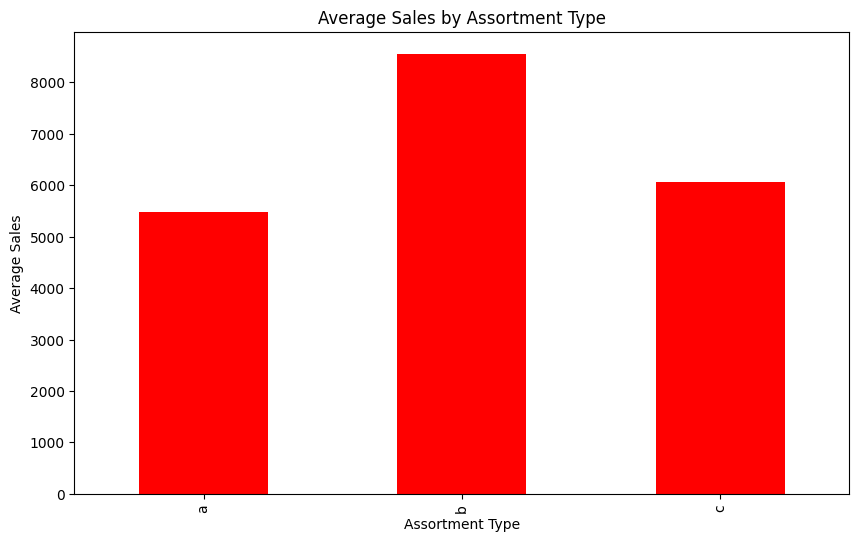

In [66]:


# Create bar plot
plt.figure(figsize=(10,6))
avg_sales_by_assortment.plot(kind='bar', color='red')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.show()


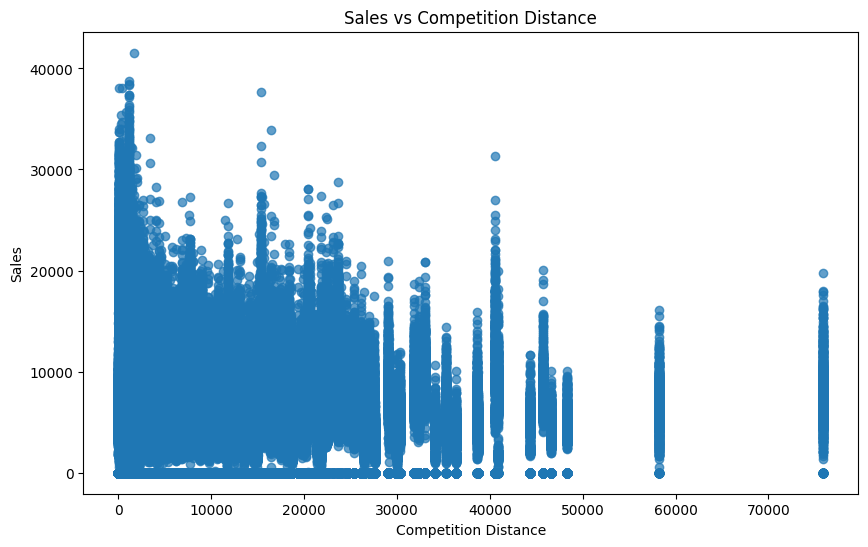

In [67]:



df = pd.merge(df_store, df_train, on='Store')

# Create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['CompetitionDistance'], df['Sales'], alpha=0.7)
plt.title('Sales vs Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()


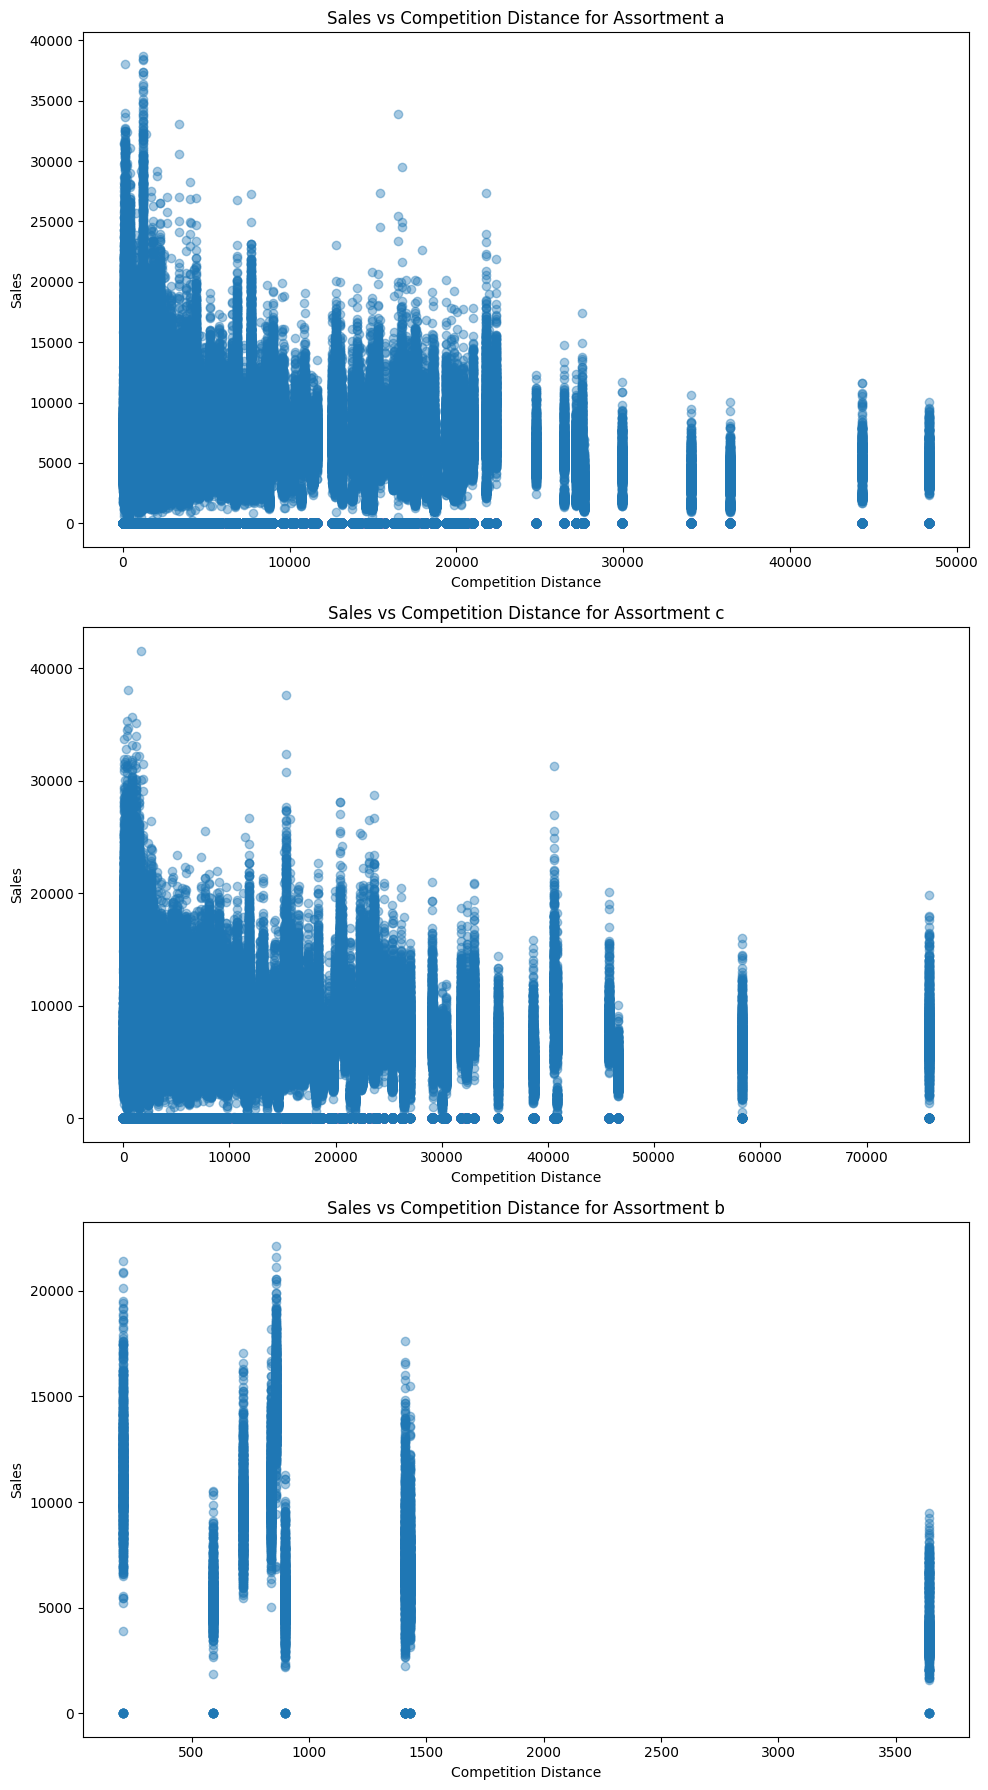

In [68]:




# Get unique assortment types
assortment_types = df['Assortment'].unique()

# Create a separate scatter plot for each assortment type
fig, ax = plt.subplots(len(assortment_types), 1, figsize=(10, 6 * len(assortment_types)))

for i, assortment in enumerate(assortment_types):
    df_assortment = df[df['Assortment'] == assortment]
    ax[i].scatter(df_assortment['CompetitionDistance'], df_assortment['Sales'], alpha=0.4)
    ax[i].set_title(f'Sales vs Competition Distance for Assortment {assortment}')
    ax[i].set_xlabel('Competition Distance')
    ax[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()


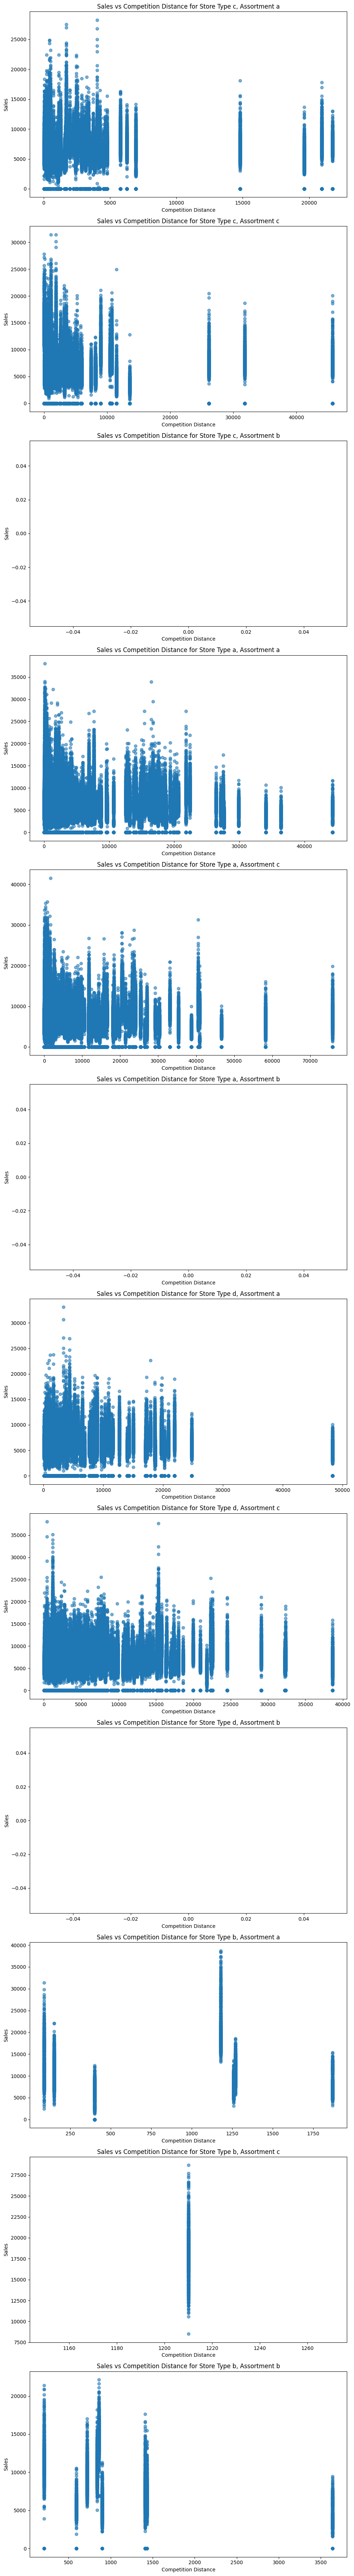

In [69]:


# Assuming df_sales is your sales DataFrame and it has 'Sales' and 'Store' columns
df = pd.merge(df_store, df_train, on='Store')

# Get unique store types and assortment types
store_types = df['StoreType'].unique()
assortment_types = df['Assortment'].unique()

# Create a separate scatter plot for each combination of store type and assortment type
fig, ax = plt.subplots(len(store_types) * len(assortment_types), 1, figsize=(10, 6 * len(store_types) * len(assortment_types)))

i = 0
for store_type in store_types:
    for assortment in assortment_types:
        df_subset = df[(df['StoreType'] == store_type) & (df['Assortment'] == assortment)]
        ax[i].scatter(df_subset['CompetitionDistance'], df_subset['Sales'], alpha=0.6)
        ax[i].set_title(f'Sales vs Competition Distance for Store Type {store_type}, Assortment {assortment}')
        ax[i].set_xlabel('Competition Distance')
        ax[i].set_ylabel('Sales')
        i += 1

plt.tight_layout()
plt.show()


How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?


In [70]:
logger.info('checking next competitor effect on sales')

INFO:__main__:checking next competitor effect on sales


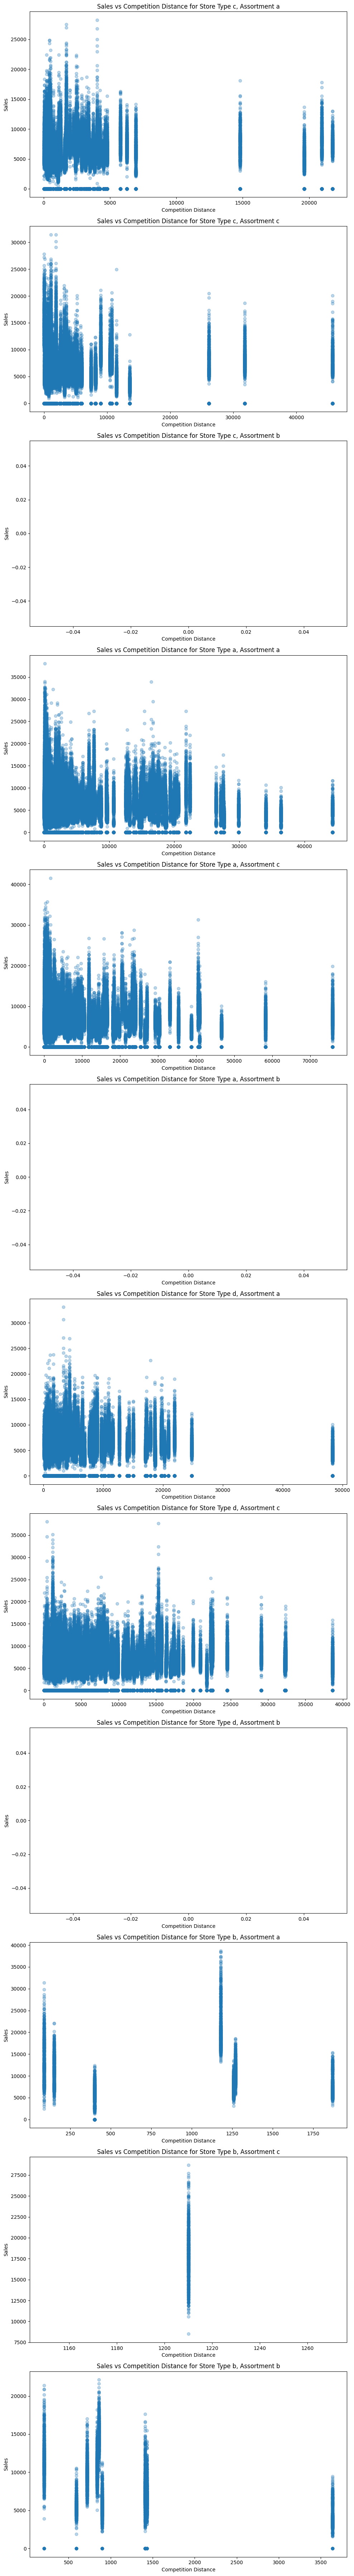

In [71]:


# Assuming df_train is your sales DataFrame and it has 'Sales' and 'Store' columns
df = pd.merge(df_store, df_train, on='Store')

# Get unique store types and assortment types
store_types = df['StoreType'].unique()
assortment_types = df['Assortment'].unique()

# Create a separate scatter plot for each combination of store type and assortment type
fig, ax = plt.subplots(len(store_types) * len(assortment_types), 1, figsize=(10, 6 * len(store_types) * len(assortment_types)))

i = 0
for store_type in store_types:
    for assortment in assortment_types:
        df_subset = df[(df['StoreType'] == store_type) & (df['Assortment'] == assortment)]
        ax[i].scatter(df_subset['CompetitionDistance'], df_subset['Sales'], alpha=0.3)
        ax[i].set_title(f'Sales vs Competition Distance for Store Type {store_type}, Assortment {assortment}')
        ax[i].set_xlabel('Competition Distance')
        ax[i].set_ylabel('Sales')
        i += 1

plt.tight_layout()
plt.show()


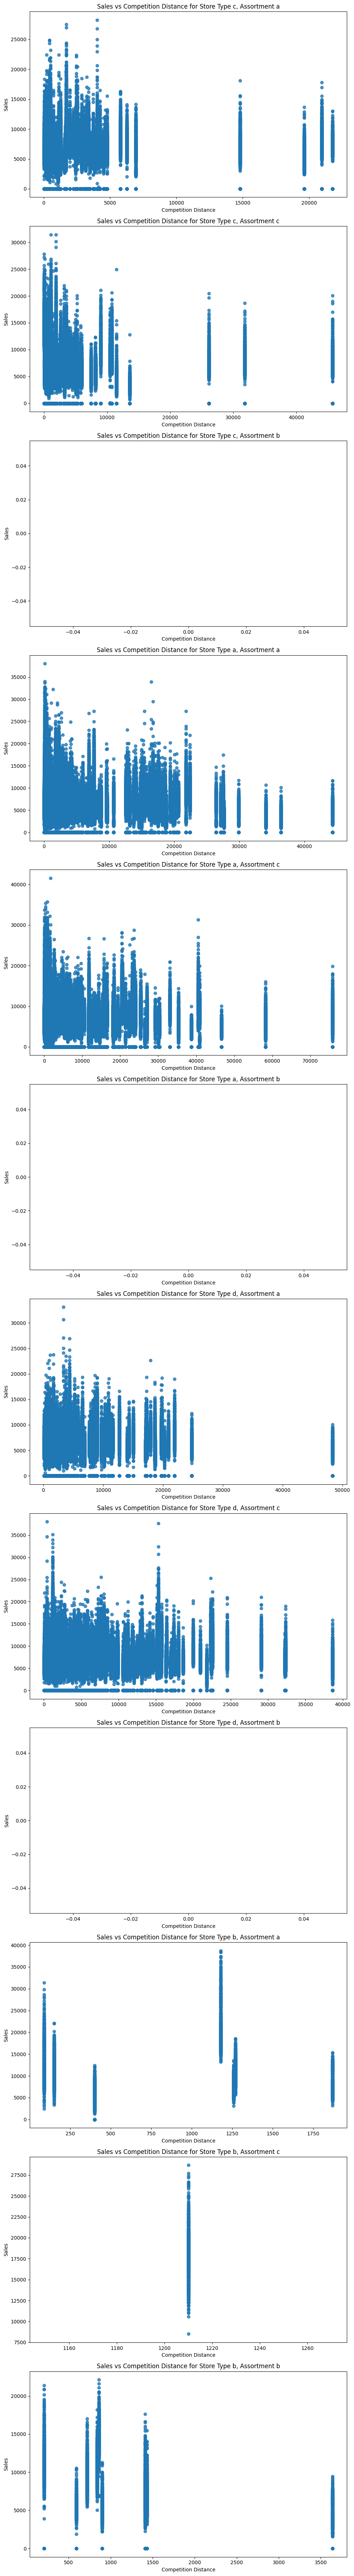

In [72]:


# Assuming df_sales is your sales DataFrame and it has 'Sales' and 'Store' columns
df = pd.merge(df_store, df_train, on='Store')

# Get unique store types and assortment types
store_types = df['StoreType'].unique()
assortment_types = df['Assortment'].unique()

# Create a separate scatter plot for each combination of store type and assortment type
fig, ax = plt.subplots(len(store_types) * len(assortment_types), 1, figsize=(10, 6 * len(store_types) * len(assortment_types)))

i = 0
for store_type in store_types:
    for assortment in assortment_types:
        df_subset = df[(df['StoreType'] == store_type) & (df['Assortment'] == assortment)]
        ax[i].scatter(df_subset['CompetitionDistance'], df_subset['Sales'], alpha=0.8)
        ax[i].set_title(f'Sales vs Competition Distance for Store Type {store_type}, Assortment {assortment}')
        ax[i].set_xlabel('Competition Distance')
        ax[i].set_ylabel('Sales')
        i += 1

plt.tight_layout()
plt.show()


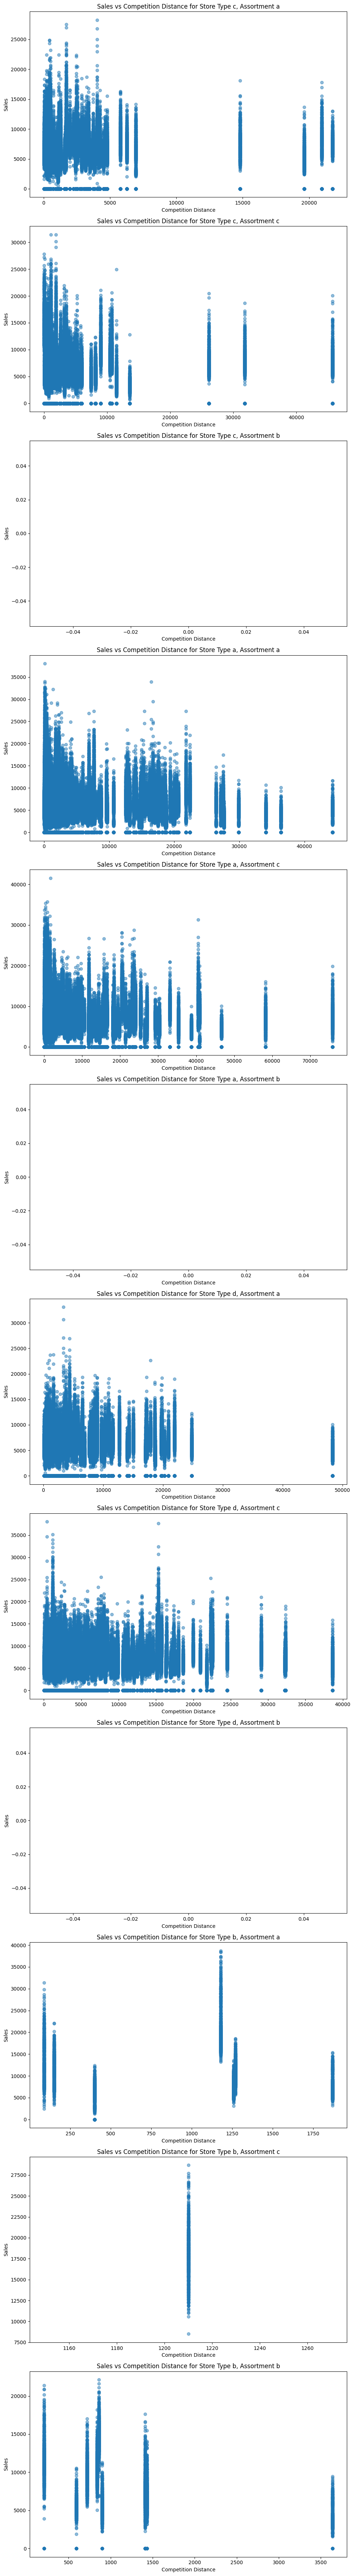

In [73]:


# Assuming df_sales is your sales DataFrame and it has 'Sales' and 'Store' columns
df = pd.merge(df_store, df_train, on='Store')

# Get unique store types and assortment types
store_types = df['StoreType'].unique()
assortment_types = df['Assortment'].unique()

# Create a separate scatter plot for each combination of store type and assortment type
fig, ax = plt.subplots(len(store_types) * len(assortment_types), 1, figsize=(10, 6 * len(store_types) * len(assortment_types)))

i = 0
for store_type in store_types:
    for assortment in assortment_types:
        df_subset = df[(df['StoreType'] == store_type) & (df['Assortment'] == assortment)]
        ax[i].scatter(df_subset['CompetitionDistance'], df_subset['Sales'], alpha=0.5)
        ax[i].set_title(f'Sales vs Competition Distance for Store Type {store_type}, Assortment {assortment}')
        ax[i].set_xlabel('Competition Distance')
        ax[i].set_ylabel('Sales')
        i += 1

plt.tight_layout()
plt.show()


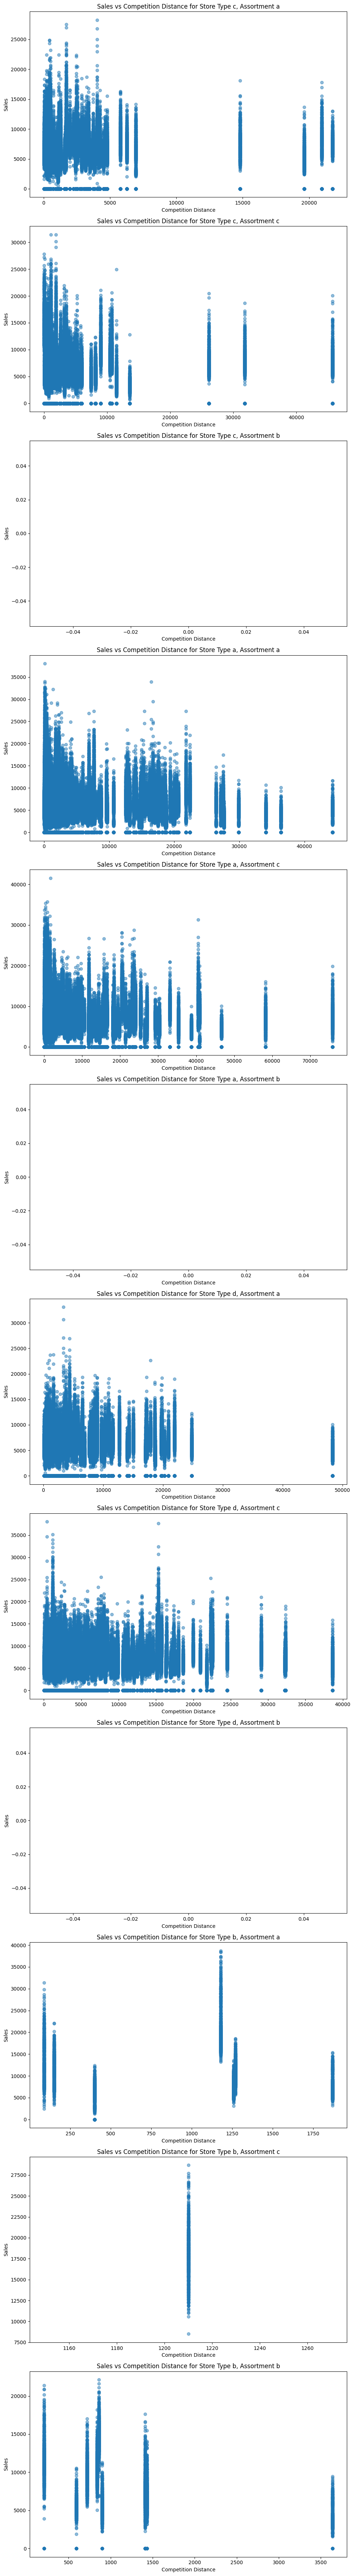

In [74]:


# Assuming df_sales is your sales DataFrame and it has 'Sales' and 'Store' columns
df = pd.merge(df_store, df_train, on='Store')

# Get unique store types and assortment types
store_types = df['StoreType'].unique()
assortment_types = df['Assortment'].unique()

# Create a separate scatter plot for each combination of store type and assortment type
fig, ax = plt.subplots(len(store_types) * len(assortment_types), 1, figsize=(10, 6 * len(store_types) * len(assortment_types)))

i = 0
for store_type in store_types:
    for assortment in assortment_types:
        df_subset = df[(df['StoreType'] == store_type) & (df['Assortment'] == assortment)]
        ax[i].scatter(df_subset['CompetitionDistance'], df_subset['Sales'], alpha=0.5)
        ax[i].set_title(f'Sales vs Competition Distance for Store Type {store_type}, Assortment {assortment}')
        ax[i].set_xlabel('Competition Distance')
        ax[i].set_ylabel('Sales')
        i += 1

plt.tight_layout()
plt.show()


How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance


In [75]:
# Assuming df_sales is your sales DataFrame and it has 'Sales', 'Store', and 'Date' columns
df = pd.merge(df_store, df_train, on='Store')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by 'Store' and 'Date'
df.sort_values(['Store', 'Date'], inplace=True)

# Forward fill 'CompetitionDistance' within each 'Store'
df['CompetitionDistance'] = df.groupby('Store')['CompetitionDistance'].ffill()

# Find stores where 'CompetitionDistance' changes from NA to a value
new_competitor_stores = df[df['CompetitionDistance'].notna() & df['CompetitionDistance'].shift().isna()]['Store'].unique()

# Analyze sales before and after new competitor for these stores
for store in new_competitor_stores:
    df_store = df[df['Store'] == store]
    new_competitor_date = df_store[df_store['CompetitionDistance'].notna()]['Date'].min()
    avg_sales_before = df_store[df_store['Date'] < new_competitor_date]['Sales'].mean()
    avg_sales_after = df_store[df_store['Date'] >= new_competitor_date]['Sales'].mean()
    print(f"Store {store}: Average sales before new competitor: {avg_sales_before}, Average sales after new competitor: {avg_sales_after}")


Store 1: Average sales before new competitor: nan, Average sales after new competitor: 3945.704883227176
Store 292: Average sales before new competitor: nan, Average sales after new competitor: 4695.2791932059445
Store 623: Average sales before new competitor: nan, Average sales after new competitor: 5810.928874734607
Store 880: Average sales before new competitor: nan, Average sales after new competitor: 6192.128450106157


In [76]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [77]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [78]:





# Replace 'NA' with np.nan for proper computations
df_store['CompetitionDistance'].replace('NA', np.nan, inplace=True)

# Convert CompetitionDistance to numeric
df_store['CompetitionDistance'] = pd.to_numeric(df_store['CompetitionDistance'])

# Find stores that had 'NA' as CompetitionDistance but later have values
stores_with_new_competitors = df_store[(df_store['CompetitionDistance'].isna()) & (df_store['CompetitionDistance'].shift(-1).notna())]['Store'].unique()

print("Stores with new competitors: ", stores_with_new_competitors)

# Merge df_store and df_train
df = pd.merge(df_store, df_train, on='Store')

# Now you can access 'Sales' data in df
for store in stores_with_new_competitors:
    before = df[(df['Store'] == store) & (df['CompetitionDistance'].isna())]['Sales'].mean()
    after = df[(df['Store'] == store) & (df['CompetitionDistance'].notna())]['Sales'].mean()
    print(f"For store {store}, average sales before and after the competitor opened are {before} and {after} respectively.")


C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_2688\1312700987.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['CompetitionDistance'].replace('NA', np.nan, inplace=True)
C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_2688\1312700987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_store['CompetitionDistance'].replace('NA',

Stores with new competitors:  []
